In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Datasets/framingham.csv')
df

Mounted at /content/drive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
df.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [6]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0],inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)
df['totChol'].fillna(df['totChol'].mode()[0],inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mode()[0],inplace=True)
df['glucose'].fillna(df['glucose'].mode()[0],inplace=True)

In [9]:
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8309748427672956

In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred1=svc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8522012578616353

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8270440251572327

In [21]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [23]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler_os=MinMaxScaler()
X_scaled_os=scaler_os.fit_transform(X_os)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled_os,y_os,test_size=0.3,random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_os=KNeighborsClassifier()
knn_os.fit(X_train,y_train)
y_pred=knn_os.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1074
           1       0.73      0.95      0.83      1084

    accuracy                           0.80      2158
   macro avg       0.83      0.80      0.80      2158
weighted avg       0.83      0.80      0.80      2158



80.02780352177943

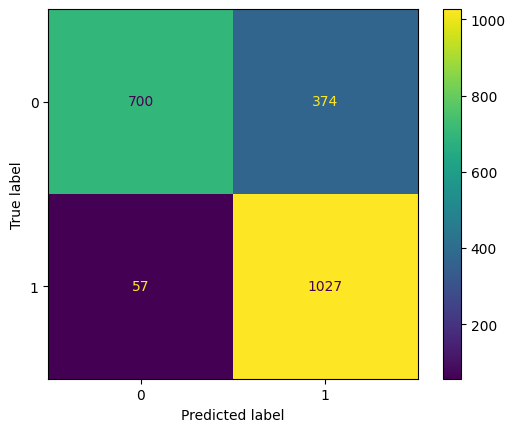

In [27]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

In [28]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler_us=MinMaxScaler()
X_scaled_us=scaler_us.fit_transform(X_us)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled_us,y_us,test_size=0.3,random_state=1)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_us=KNeighborsClassifier()
knn_us.fit(X_train,y_train)
y_pred=knn_us.predict(X_test)

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       196
           1       0.59      0.61      0.60       191

    accuracy                           0.60       387
   macro avg       0.60      0.60      0.60       387
weighted avg       0.60      0.60      0.60       387



59.9483204134367

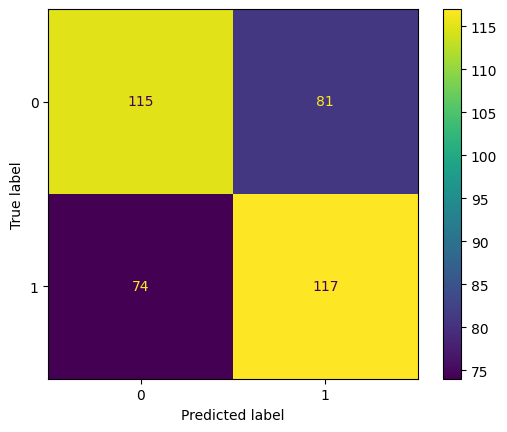

In [34]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)*100